### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [16]:
cars = pd.read_csv("vehicle.csv").dropna()
cars.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [18]:
cars["class"].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [19]:
cars.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [20]:
class_set=cars[['class']]
cars=cars.drop('class', axis=1)
from scipy.stats import zscore
cars_scaled = cars.apply(zscore)
cars_scaled

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [22]:
from sklearn.cluster import KMeans
Cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [23]:
cluster_range = range( 1, 10 )
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(cars_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Cluster_error": Cluster_error } )

In [24]:
clusters_df

,num_clusters,Cluster_error
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.286384
4,5,5192.924772
5,6,4706.433256
6,7,4350.686420
7,8,4087.480072
8,9,3867.629387


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

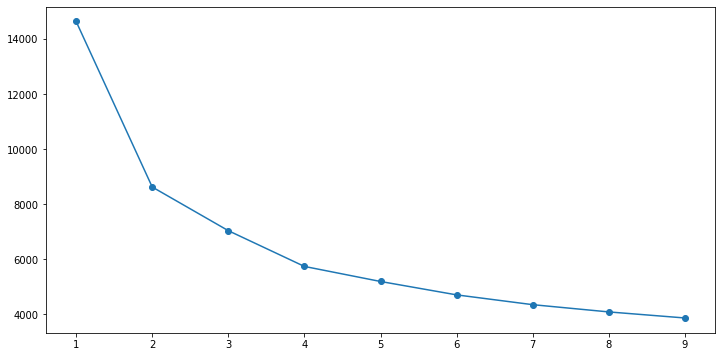

In [25]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Cluster_error, marker = "o" )

### Find out the optimal value of K

In [26]:
print('Looks like optimal value of K is 4')

Looks like optimal value of K is 4


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [29]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2)
kmeans.fit(cars_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [32]:
centroids=kmeans.cluster_centers_


### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [33]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_scaled) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
1,-0.916833,-0.526197,-0.887660,-1.087301,-0.563172,-0.301083,-0.780130,0.867496,-0.746977,-0.490093,-0.801399,-0.784100,-0.393622,0.779115,-0.091855,-0.283968,-1.043366,-1.099425
2,-0.225338,-0.574343,-0.307614,-0.038187,0.181774,-0.172461,-0.455562,0.320123,-0.483944,-0.536606,-0.420568,-0.460233,-0.603828,-0.644323,-0.060996,0.004548,0.824842,0.707985
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.38978847975148845


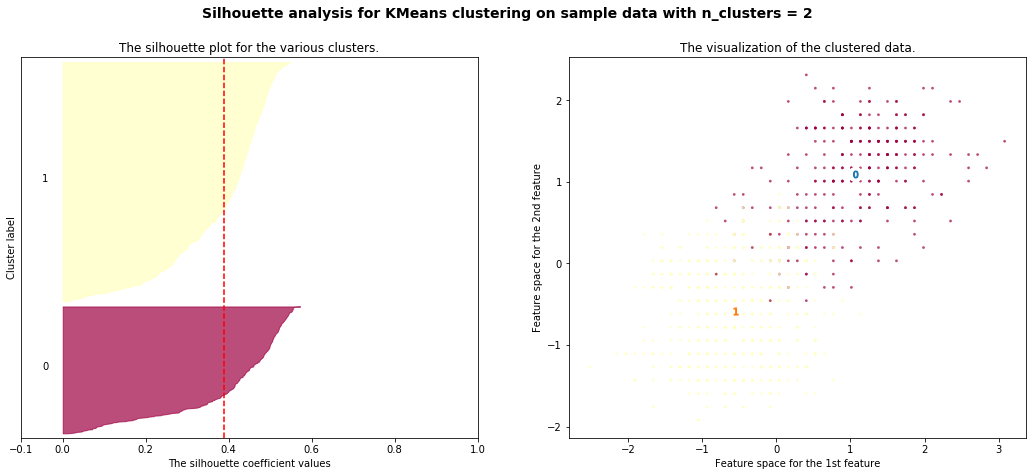

For n_clusters = 3 The average silhouette_score is : 0.29041502127885166


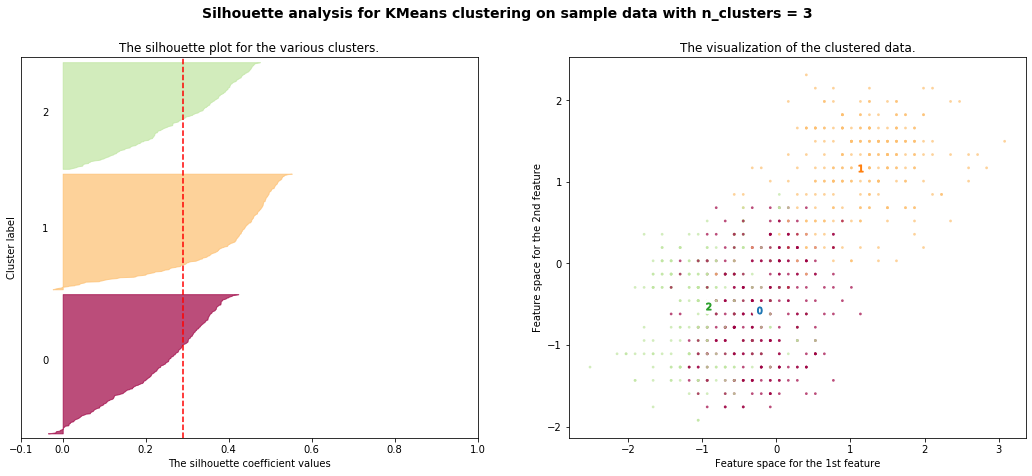

For n_clusters = 4 The average silhouette_score is : 0.30438010062785437


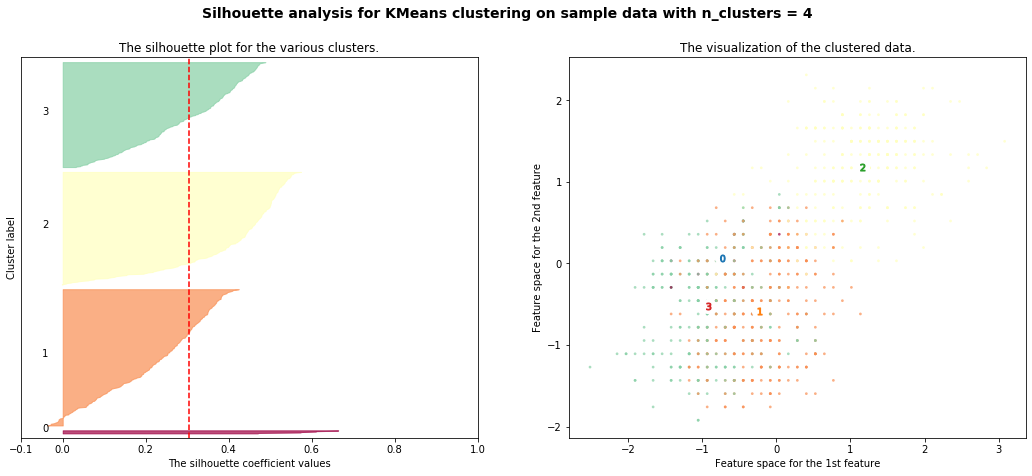

For n_clusters = 5 The average silhouette_score is : 0.24349283662841362


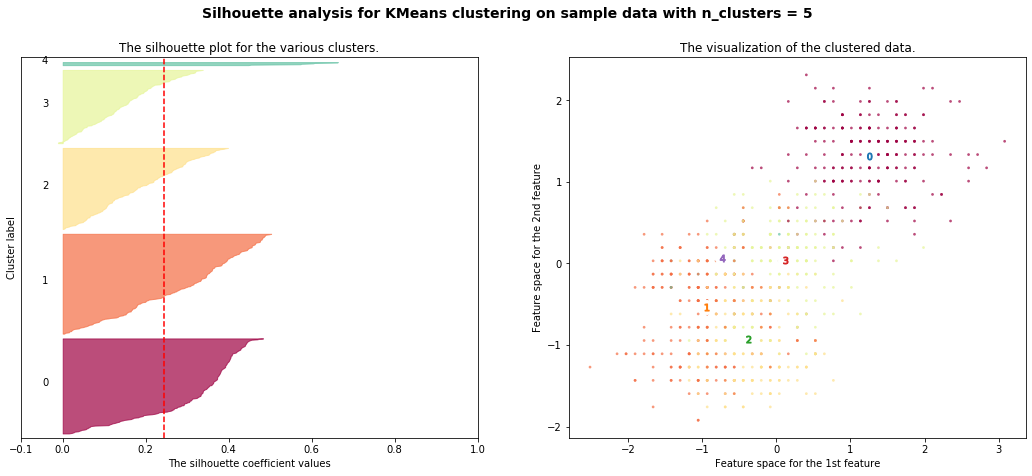

For n_clusters = 6 The average silhouette_score is : 0.212256373845071


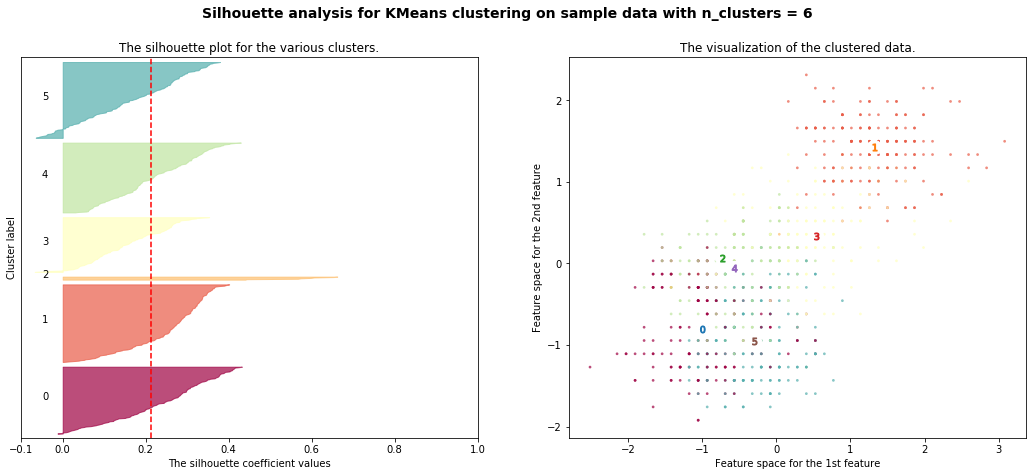

For n_clusters = 7 The average silhouette_score is : 0.20711511077537317


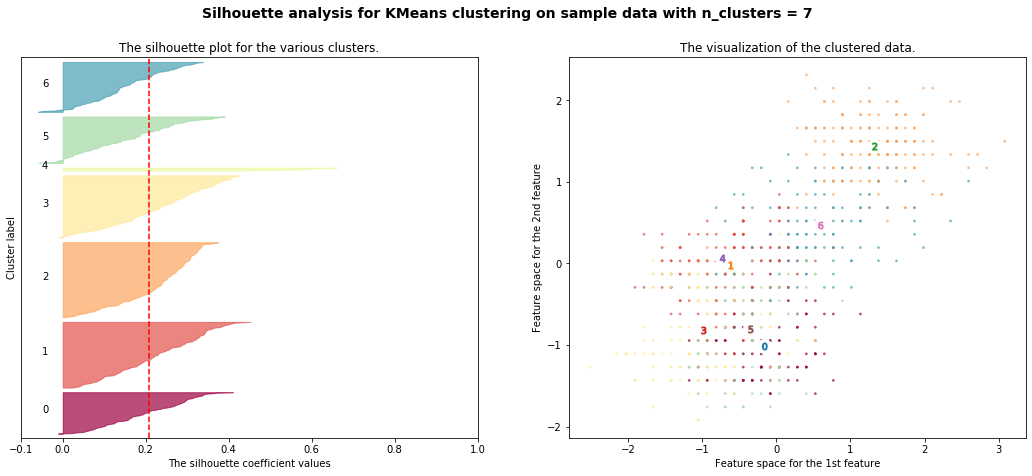

For n_clusters = 8 The average silhouette_score is : 0.19502289960293687


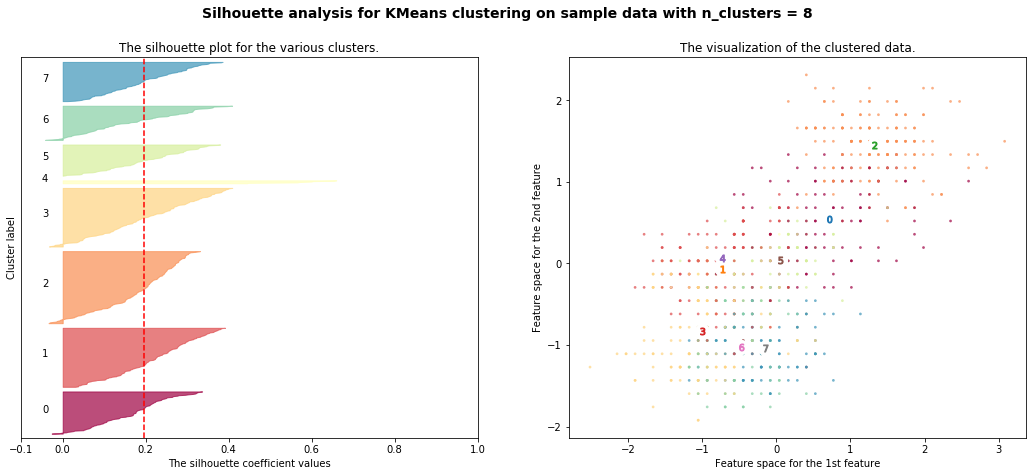

In [50]:
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=cars_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

From Silhouette_score analysis, it seems 4 or 5 remains optimal value of K as with 4, value of silhouette_score is highest. But negative values are observed in cluster with label 2.
With K=5, though silhouette_score is slightly low, but there are no negative values in any cluster. K can be chosen either 4 or 5

### Use kmeans.labels_ function to print out the labels of the classes

In [37]:
cars_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cars_labels['labels'] = cars_labels['labels'].astype('category')
cars_df_labeled = cars_scaled.join(cars_labels)
cars_df_labeled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,labels
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,2
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,3


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [124]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [129]:
df1=pd.DataFrame(a, columns=['A','B'])
df2=pd.DataFrame(b, columns=['A','B'])
df3=pd.DataFrame(c, columns=['A','B'])

df=pd.concat([df1,df2,df3])

from scipy.stats import zscore
df_scaled = df.apply(zscore)
df_scaled


,A,B
0,1.340744,-0.742754
1,0.835221,-1.055437
2,0.519579,-1.035978
3,0.409292,-1.378463
4,0.145468,-1.598963
5,0.406242,-1.036445
6,0.266416,-1.083914
7,0.492666,-1.421520
8,1.094515,-1.301438
9,1.331241,-0.765252


In [130]:
df_scaled

,A,B
0,1.340744,-0.742754
1,0.835221,-1.055437
2,0.519579,-1.035978
3,0.409292,-1.378463
4,0.145468,-1.598963
5,0.406242,-1.036445
6,0.266416,-1.083914
7,0.492666,-1.421520
8,1.094515,-1.301438
9,1.331241,-0.765252


### 10. Use scatter matrix to print all the 3 distributions

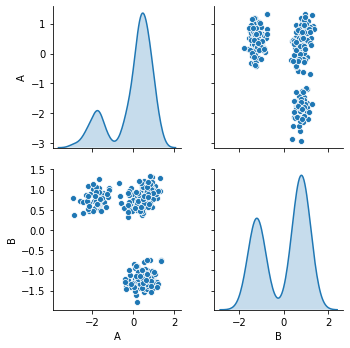

In [131]:
import seaborn as sns
sns.pairplot(df_scaled,diag_kind='kde')

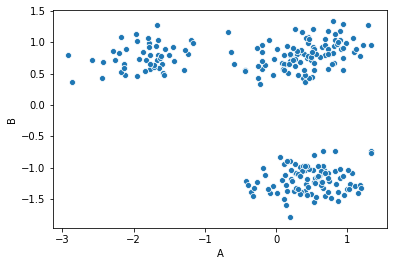

In [132]:
sns.scatterplot(x=df_scaled['A'],y=df_scaled['B'])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [56]:
from sklearn.cluster import AgglomerativeClustering 

In [133]:
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
model2.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

### 12. Plot the dendrogram for the consolidated dataframe

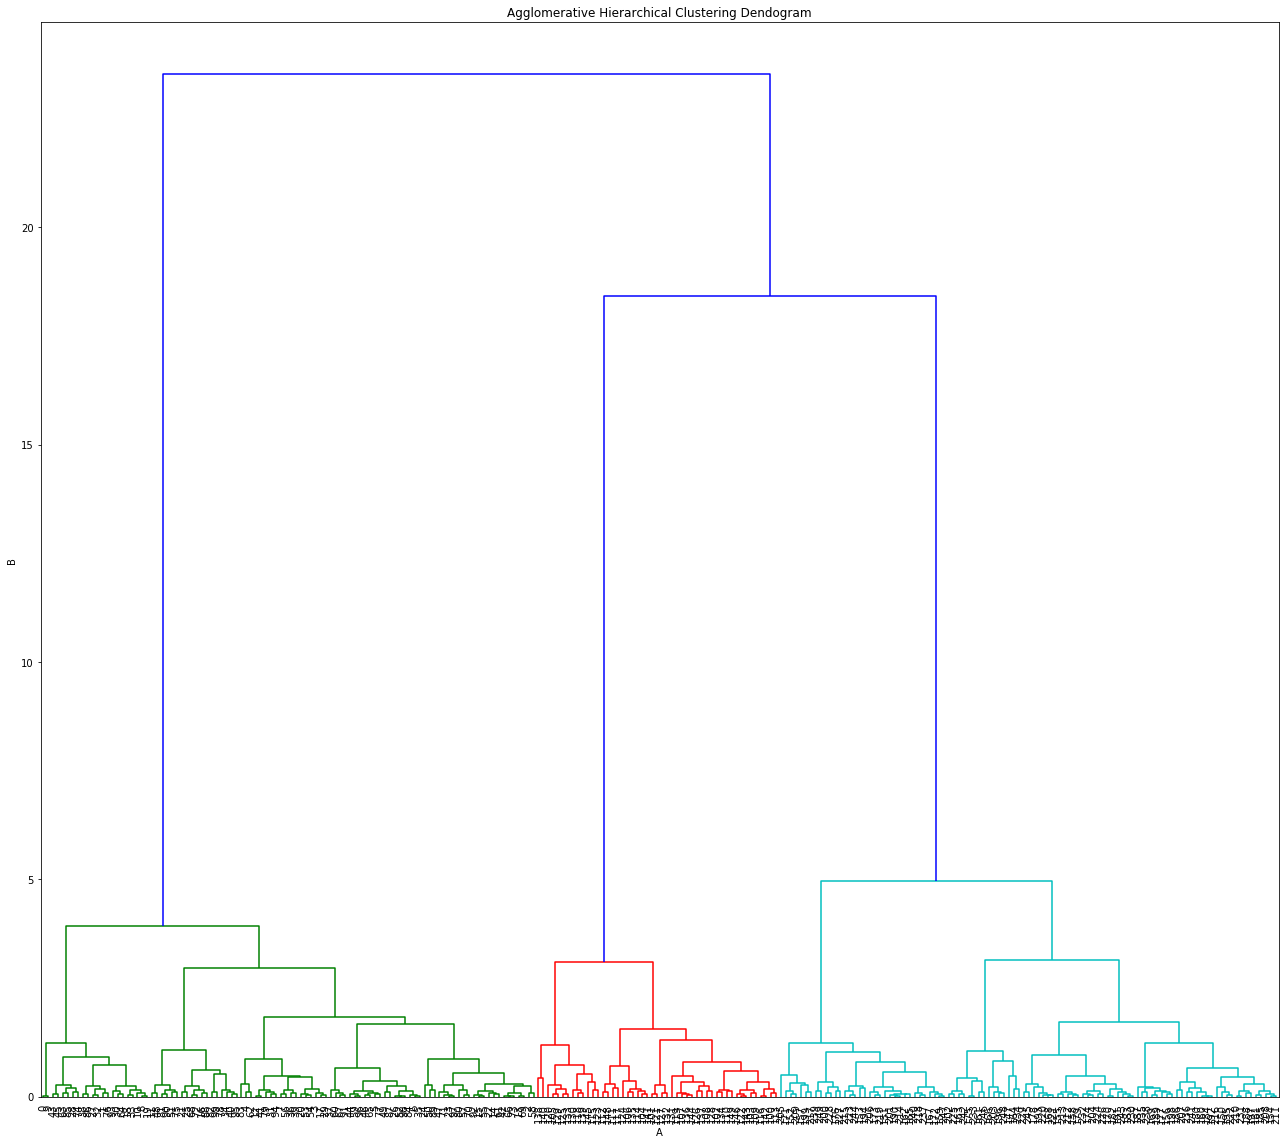

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('A')
plt.ylabel('B')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=6,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

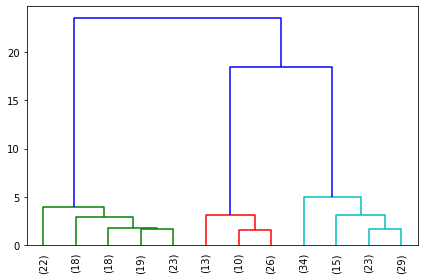

In [136]:
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=6,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [137]:
from scipy.cluster.hierarchy import fcluster

X=fcluster(Z, t=6, criterion='distance')


### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [145]:
X=fcluster(Z, t=6, criterion='distance')
print(X)
labl=pd.DataFrame(X, columns=['label'])
labl

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


,label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [155]:
final_df=df_scaled.join(labl)
final_df['label'].value_counts()

1    250
Name: label, dtype: int64

### Use matplotlib to visually observe the clusters in 2D space 

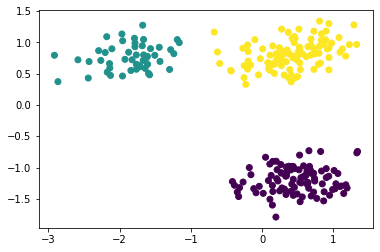

In [160]:
import matplotlib.cm as cm
plt.scatter(x=df_scaled['A'],y=df_scaled['B'], c=labl['label'] )
